In [1]:
%matplotlib notebook
import gym, IPython
from QLearner import DQNAgent
from atari_wrappers import wrap_deepmind
import matplotlib.pyplot as plt
import torch

In [2]:
def init_plots():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    
    fig.show()
    fig.canvas.draw()
    return fig, ax

In [3]:
def update_plot(fig, ax, avg_rewards):
    ax.clear()
    ax.plot(avg_rewards)
    fig.canvas.draw()

In [4]:
def train_model(num_time_steps, agent_params):
    
    # make env get frame info.
    env = wrap_deepmind(gym.make('PongNoFrameskip-v4'))
    frame = env.reset()
    height, width, channels = frame.shape
    running_mean = []
    
    #agent params.
    num_frames = agent_params['num_frames']
    buffer_size = agent_params['buffer_size']
    batch_size = agent_params['batch_size']
    start_learning_steps = agent_params['start_learning_steps']
    update_freq = agent_params['update_freq']
    learning_rate = agent_params['learning_rate']
    update_target = 10000
    DoubleQ = True
    
    #init fig 1
    fig_1, ax_1 = init_plots()
    step_plot = 5000
    
    fig_2, ax_2 = init_plots()
    
    # initalize the agent.
    agent = DQNAgent(env, height, width, channels, num_frames, env.action_space.n,
                     num_timesteps=num_time_steps, buffer_size=buffer_size, doubleQ=DoubleQ)
    eps = 1
    # main training loop.
    piece_wise_1 = 4e6
    peice_wise_2 = num_time_steps/8
    
    for step_num in range(num_time_steps):
        
        #update eps
        if step_num < piece_wise_1:
            eps = 1 - (step_num / piece_wise_1)*0.9
        elif (step_num > piece_wise_1 and step_num < peice_wise_2):
            eps = 0.1 - ((step_num - piece_wise_1) / (peice_wise_2 - piece_wise_1))*0.09
        elif step_num > peice_wise_2:
            eps = 0.01
        
        # step the agent.
        _, _, _, done = agent.step_env(eps)
        
        # if we need to update.
        if (step_num >= start_learning_steps) and (step_num % update_freq == 0):
            
            # update the model.
            agent.update(batch_size, step_num%update_target==0)
            
            
        if step_num % int(step_plot) == 0:
            print("step num %s" % step_num)
            step_plot*=1.5
            # update the plot
            
        if done:
            
            if len(agent.mean_episode_rewards) > 101:
                running_mean.append(sum(agent.mean_episode_rewards[-100:])/100)
                update_plot(fig_2, ax_2, running_mean)
            
            update_plot(fig_1, ax_1, agent.mean_episode_rewards)
                        
            #print("Highest Reward so far: %s\n"%str(agent.best_mean_episode_reward))
            
    return agent

In [3]:
agent_params = {'num_frames':4, 'buffer_size':1000000, 'batch_size':32,
               'start_learning_steps':50000, 'update_freq':4, 'learning_rate':1e-4}

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.uint8'>. Please provide explicit dtype.
WARN: <class 'atari_wrappers.ClippedRewardsWrapper'> doesn't implement 'reset' method, which is required for wrappers derived directly from Wrapper. Deprecated default implementation is used.


<IPython.core.display.Javascript object>


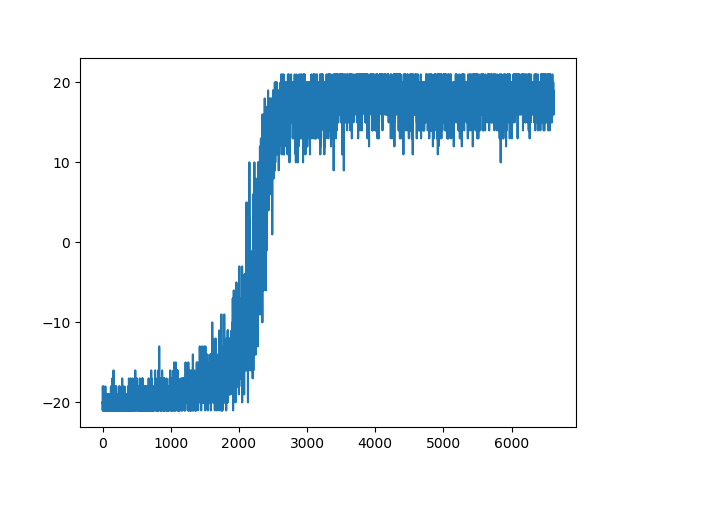

<IPython.core.display.Javascript object>


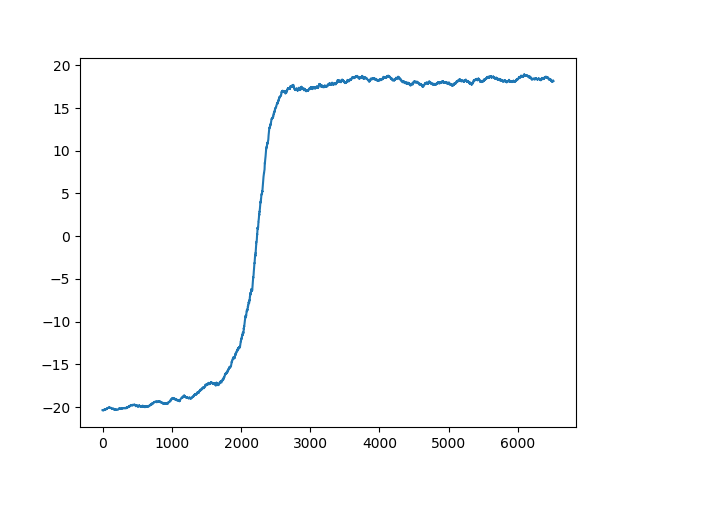

step num 0
New highest reward: -20.0

New highest reward: -18.0

step num 7500
step num 11250
step num 16875
step num 25312
step num 37968
step num 56953
step num 85429
step num 128144
New highest reward: -17.0

New highest reward: -16.0

step num 192216
step num 288325
step num 432487
step num 648731
New highest reward: -13.0

step num 973097
step num 1459646
New highest reward: -10.0

New highest reward: -9.0

step num 2189469
New highest reward: -7.0

New highest reward: -6.0

New highest reward: -5.0

New highest reward: -3.0

New highest reward: 5.0

New highest reward: 10.0

New highest reward: 12.0

New highest reward: 13.0

step num 3284204
New highest reward: 16.0

New highest reward: 18.0

New highest reward: 19.0

New highest reward: 20.0

New highest reward: 21.0

step num 4926306
step num 7389459
step num 11084189


KeyboardInterrupt: 

In [6]:
agent = train_model(int(2e8), agent_params)

In [4]:
    env = wrap_deepmind(gym.make('PongNoFrameskip-v4'))
    frame = env.reset()
    height, width, channels = frame.shape
    running_mean = []
    
    #agent params.
    num_frames = agent_params['num_frames']
    buffer_size = agent_params['buffer_size']
    batch_size = agent_params['batch_size']
    start_learning_steps = agent_params['start_learning_steps']
    update_freq = agent_params['update_freq']
    learning_rate = agent_params['learning_rate']
    update_target = 10000
    DoubleQ = True

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.uint8'>. Please provide explicit dtype.


In [5]:
agent = DQNAgent(env, height, width, channels, num_frames, env.action_space.n,
                     num_timesteps=2e8, buffer_size=buffer_size, doubleQ=DoubleQ)

In [6]:
agent.current.load_state_dict(torch.load("current_model_state"))

<All keys matched successfully>

In [7]:
agent.target.load_state_dict(torch.load("current_model_state"))

<All keys matched successfully>

In [8]:
agent.render_episode()

New highest reward: 21.0

